# Data Visualizations

<a id="0"></a>
Table of contents
- [Bar Charts](#1)
  - [Bar charts by seaborn](#2)
  - [Bar charts by matplotlib](#3)
- [Absolute and Relative frequency](#4)
  - [xticks and yticks functions](#5)
  - [Additional variations](#6)
- [Counting Missing Values](#7)
- [Pie Charts](#8)
  - [Donut Plots](#9)
- [Histogram](#10)  

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id = "1"></a>
## Bar Charts 
[table of contents](#0)

In [3]:
# load the dataset
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


<a id="2"></a>
### Bar Chart by Seaborn
[table of contents](#0)

Syntax:
```
seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None)
```

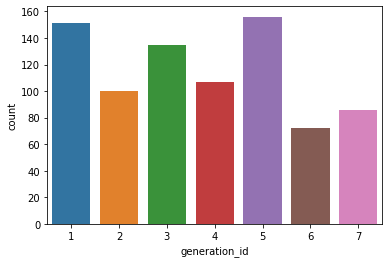

In [5]:
# make a default bar chart by generation_id
sb.countplot(data=pokemon, x='generation_id');

In [4]:
# the default color is distracting and not necessary
# we would like to pick a different color palette
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [5]:
# pick a blue color palette
base_color = sb.color_palette()[0]

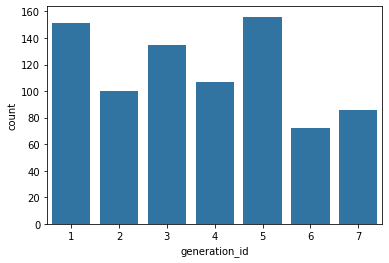

In [11]:
# set the base color, now much cleaner
sb.countplot(data=pokemon, x='generation_id', color=base_color);

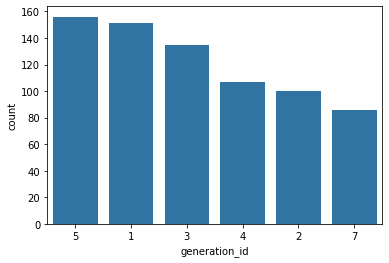

In [12]:
# sort the number of pokemon species done by order parameter
# hard-coded version
sb.countplot(data=pokemon, x='generation_id', color=base_color, 
             order=[5, 1, 3, 4, 2, 7]);

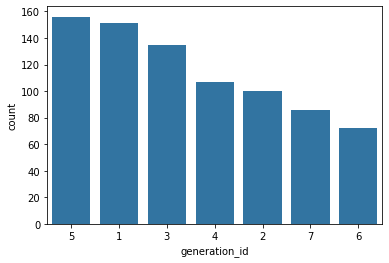

In [13]:
# cont. 
# programmatic version (better approach)
gen_order = pokemon.generation_id.value_counts().index
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

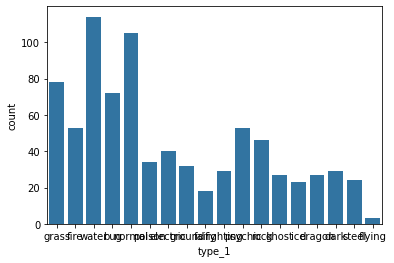

In [14]:
# make a default bar chart by type_1
# overlapping x labels
sb.countplot(data=pokemon, x='type_1', color=base_color);

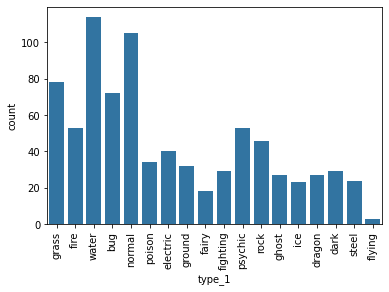

In [16]:
# to get around of it. We can:
# 1. rotate the x labels
sb.countplot(data=pokemon, x='type_1', color=base_color);
plt.xticks(rotation=90);

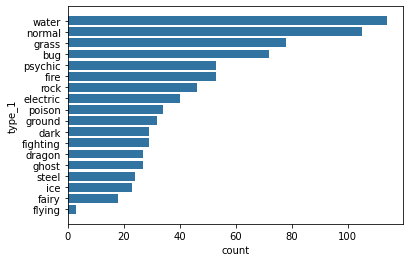

In [13]:
# 2. create a horizontal bar chart
# and sort by type frequency
type_order = pokemon.type_1.value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);
plt.axis('auto');

<a id="3"></a>
### Bar Chart by Matplotlib
[table of contents](#0)

Syntax:
```
matplotlib.pyplot.bar(x, y, width=0.8, bottom=None, *, align='center', data=None)
```

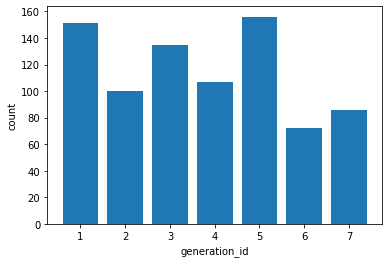

In [25]:
# return the Series having unique values
x = pokemon.generation_id.unique()

# return the Series having frequency count of each unique value
y = pokemon.generation_id.value_counts(sort=False)

# plot
plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

<a id="4"> </a>
### Absolute vs Relative Frequency
[table of contents](#0)

In [16]:
# take part of and reshape the pokemon dataframe
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                          value_vars=['type_1', 'type_2'],
                          var_name='type_level',
                          value_name='type')

# now each species has 2 types, so the number of rows doubled
pkmn_types.sort_values('id')

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
807,1,bulbasaur,type_2,poison
1,2,ivysaur,type_1,grass
808,2,ivysaur,type_2,poison
2,3,venusaur,type_1,grass
...,...,...,...,...
804,805,stakataka,type_1,rock
1612,806,blacephalon,type_2,ghost
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric


In [78]:
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [17]:
# plot the bar chart now
# Count the frequency of unique values 
# in the `type` column of pkmn_types dataframe. 
# by default, returns the decreasing order of the frequency
type_counts = pkmn_types.type.value_counts()

# Get the unique values of the `type` column, 
# in the decreasing order of the frequency.
type_order = type_counts.index

In [80]:
# show the type counts
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [51]:
type_counts.shape

(18,)

In [81]:
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'steel', 'fairy',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

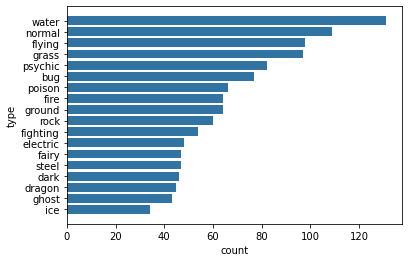

In [19]:
# make a horizontal bar chart with absolute counts
# fig, ax = plt.subplots(figsize=(8, 10))
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
plt.axis('tight');

One method of plotting the data in terms of relative frequency on a bar chart is to just relabel the count's axis in terms of proportions. The underlying data will be the same, it will simply be the scale of the axis ticks that will be changed.

In [23]:
# find the max proportion of bar
# returns the sum of all non-null values in `type` column
n_pokemon = type_counts.sum()

# return the highest frequency in the `type` column
max_type_count = type_counts[0]

# return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


In [24]:
# Use numpy.arange() function to produce a set of evenly spaced 
# proportioned values between 0 and max_prop, with a step size 2%

tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

We need x-tick labels that must be evenly spaced on the x-axis. For this purpose, we must have a list of labels ready with us, before using it with `plt.xticks()` function.

In [25]:
# create a list of String values that can be used as tick labels.
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

<a id="5"></a>
#### The xticks and yticks functions: 

The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

[table of contents](#0)

In [ ]:
# make the charts with new x-tick labels
fig, ax = plt.subplots(figsize=(6, 8))
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order, ax=ax);

# Change the tick locations and labels
plt.xticks(ticks=tick_props * n_pokemon, labels=tick_names)
plt.xlabel('proportion');
# plt.axis('auto');

<a id="6"></a>
#### Additional Variations
[table of contents](#0)

Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

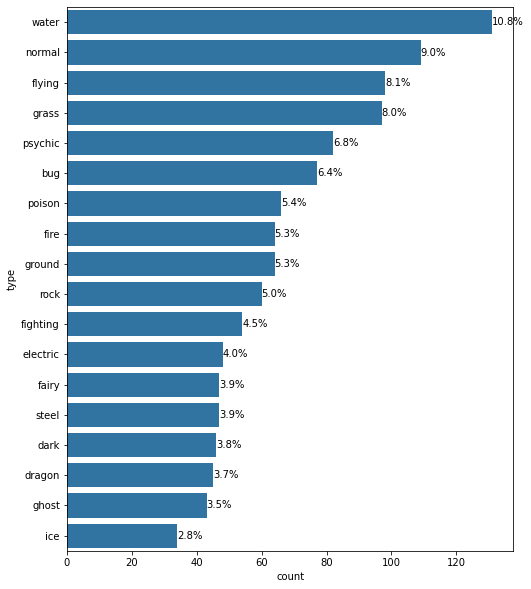

In [30]:
# print the text (proportion) on the bars of a horizontal plot
fig, ax = plt.subplots(figsize=(8, 10))

sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order, ax=ax);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    
    # Remember, type_counts contains the frequency of unique values in 
    # the `type` column in decreasing order.
    count = type_counts[i]
    
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    
    # Print the string value on the bar
    plt.text(count, i, pct_string, va='center')
    
# change the figure size in inches
# plt.rcParams['figure.figsize'] = 10, 12
# plt.axis('auto');

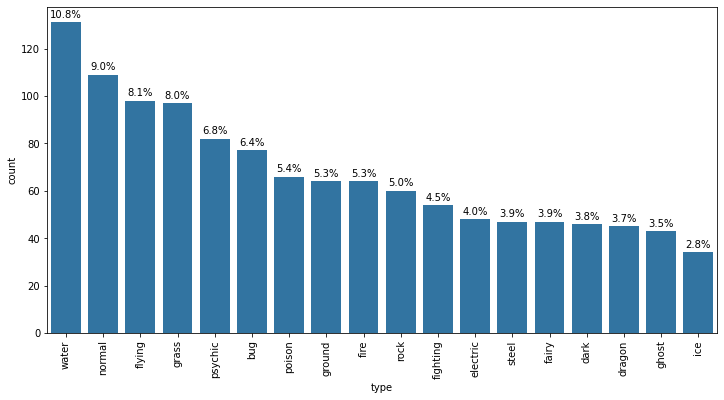

In [106]:
# Print the text (proportion) below the bars of a Vertical plot
fig, ax = plt.subplots(figsize=(12,6))

g = sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order, ax=ax);

# Recalculating the type_counts just to have clarity
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

# Specify the figure size in inches, for both X, and Y axes
# plt.rcParams['figure.figsize'] = 12, 8


<a id="7"></a>
## Counting Missing values
[table of contents](#0)

In [6]:
# load the dataset
sales_data = pd.read_csv("sales-data.csv")
sales_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [13]:
# take a look the summary of the missing values 
sales_data.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [14]:
# chop some columns out
na_counts = sales_data.drop(columns=['Date', 'Temperature', 'Fuel_Price']).isna().sum()

In [15]:
na_counts

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [18]:
na_counts.index

Index(['Store', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'],
      dtype='object')

In [19]:
na_counts.values

array([   0, 4158, 5269, 4577, 4726, 4140,  585,  585,    0], dtype=int64)

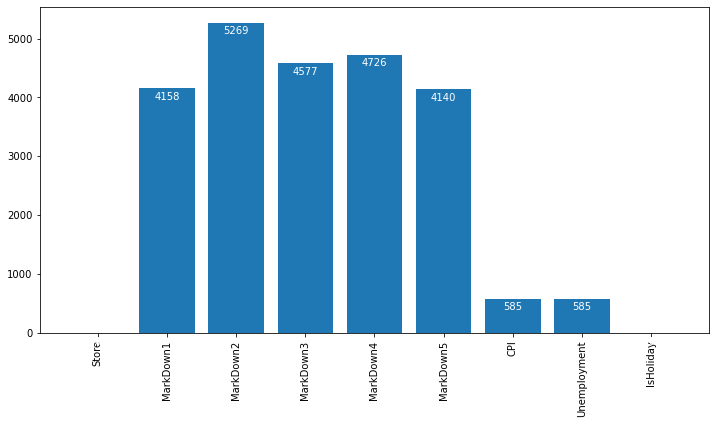

In [105]:
# using plt.bar()
fig, ax = plt.subplots(figsize=(12,6))
plt.bar(na_counts.index, na_counts.values)
plt.xticks(rotation=90);

# add the count at the top of the bar
for i, count in enumerate(na_counts):    
    count_str = '{:d}'.format(count)
    plt.text(i, count-60, count_str, ha='center', va='top', color='white')

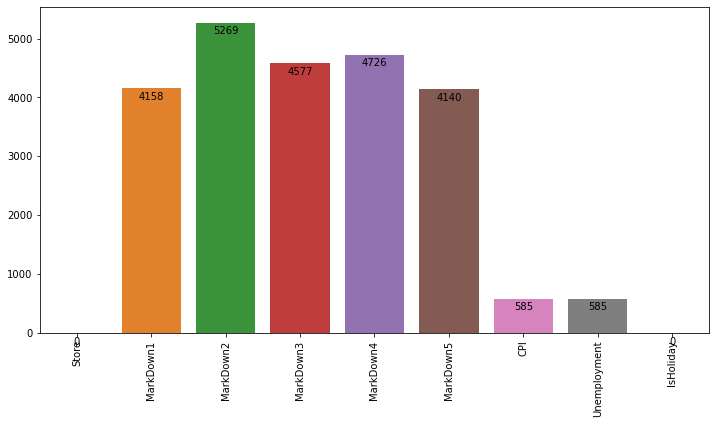

In [103]:
# using seaborn
fig, ax = plt.subplots(figsize=(12,6))

sb.barplot(x=na_counts.index, y=na_counts.values, ax=ax)
plt.xticks(rotation=90);

# add the count at the top the of the bar
locs, labels = plt.xticks(rotation=90)
for loc, label in zip(locs, labels):
    count = na_counts[label.get_text()]
    count_str = '{:d}'.format(count)
    plt.text(loc, count-60, count_str, ha='center', va='top')    


<a id="8"></a>
## Pie Charts
[Table of contents](#0)

In [34]:
sorted_counts = pokemon.generation_id.value_counts()
sorted_counts

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

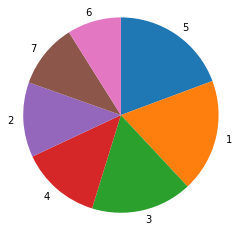

In [33]:
plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=False)
plt.axis('square');

<a id="9"></a>
### Donut Plots
[Table of contents](#0)

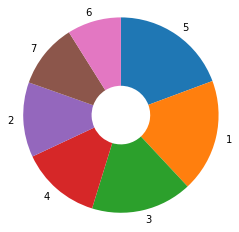

In [39]:
# create a donut plot using wedgeprops
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.7});
plt.axis('square');

<a id="10"></a>
## Histogram
[Table of contents](#0)

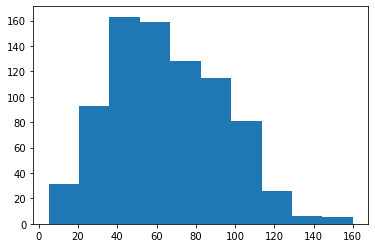

In [41]:
# create a histogram using plt.hist()
# default bin size is 10
plt.hist(data=pokemon, x='speed');

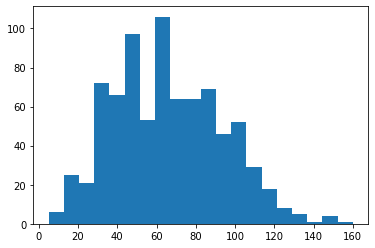

In [42]:
# specify bin size by a constant
plt.hist(data=pokemon, x='speed', bins=20);

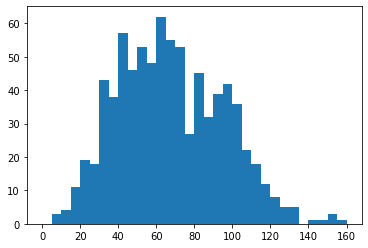

In [43]:
# specify bin boundaries explicitly
# use numpy arange() to create bins of step-size 5 
bins = np.arange(0, pokemon.speed.max()+5, 5)  # it does not include max value, thus max()+5
plt.hist(data=pokemon, x='speed', bins=bins);

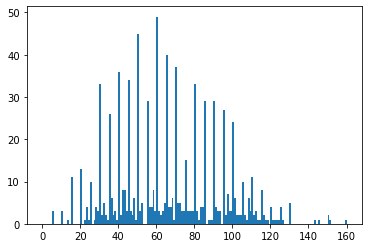

In [51]:
# specify extremely small bin size
# use numpy arange() to create bins of size 1 
bins = np.arange(0, pokemon.speed.max()+1, 1)
plt.hist(data=pokemon, x='speed', bins=bins);

### Use seaborn for histograms

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


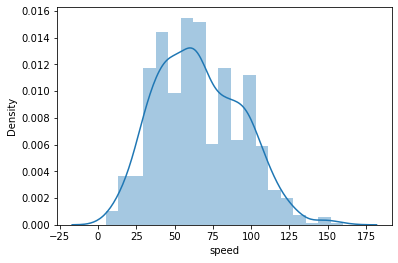

In [54]:
# create a histgram using seaborn distplot
# only take a mandatory Series argument
# the default bin count is larger than in matplotlib
# the y axis value is very small because the line is a density curve estimate of the 
# data distribution, and the area under the curve is set to equal to 1

sb.distplot(pokemon.speed);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


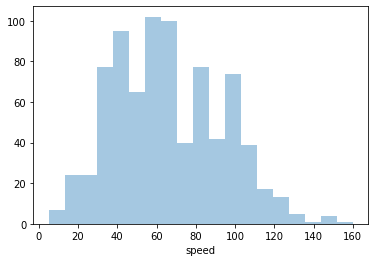

In [55]:
# turn off the density curve by the kde (kernel density estimation) parameter
# the y axis values now becomes the normal counts
sb.distplot(pokemon.speed, kde=False);

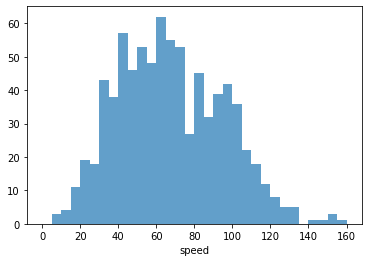

In [60]:
# still better idea to use customized bin size
bin_edges = np.arange(0, pokemon['speed'].max()+5, 5)
sb.distplot(pokemon['speed'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 0.7});

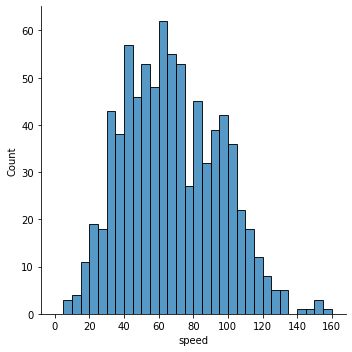

In [68]:
# use seaborn displot()
bin_edges = np.arange(0, pokemon['speed'].max()+5, 5)
sb.displot(pokemon.speed, bins=bin_edges);

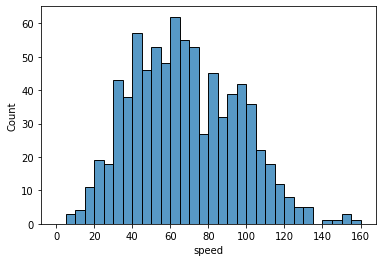

In [70]:
# use seaborn histplot()
bin_edges = np.arange(0, pokemon['speed'].max()+5, 5)
sb.histplot(pokemon.speed, bins=bin_edges);

### Plot two histograms side-by-side

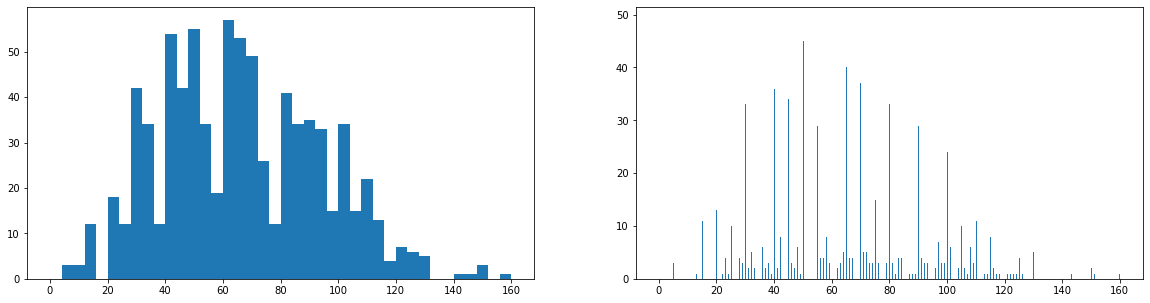

In [72]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5])

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data=pokemon, x='speed', bins=bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data=pokemon, x='speed', bins=bins);

### Figure and Axes 
The base of visualization in matplotlib is a Figure object. Contained within each Figure will be one or more Axes objects, each Axes object containing a number of other elements that represent each plot. In the earliest examples, these objects have been created implicitly.

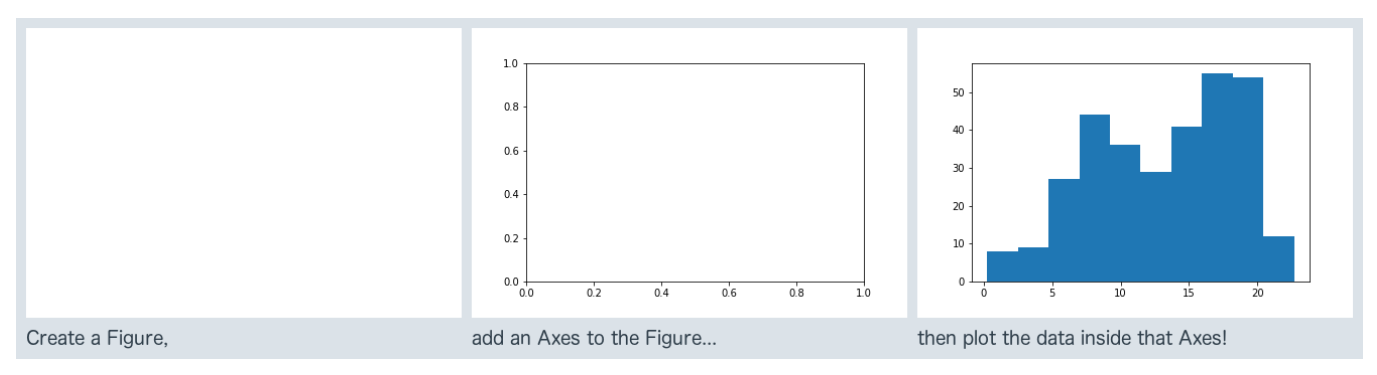 [from Udacity]

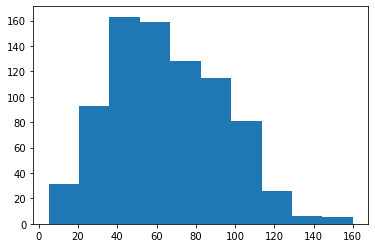

In [73]:
# We could have created the histogram is to explicitly set up the Figure and Axes like this:

# Create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of 
# the new axes. The first two elements of the list indicate the position of the 
# lower-left hand corner of the Axes, 
# in this case one quarter of the way from the lower-left corner of the Figure
# And the last two elements specifying the Axes width and height respectively
# All quantities are in fractions of figure width and height.

ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

To use Axes objects with seaborn, seaborn functions usually have an "ax" parameter to specify upon which Axes a plot will be drawn.

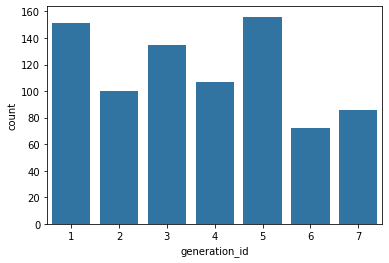

In [75]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax);

plt.subplot(1, 2, 1) creates a new Axes in our Figure, its size determined by the subplot() function arguments. The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new Axes in the first slot. Then, plt.subplot(1, 2, 2) creates a new Axes in the second subplot slot, and sets that one as the current Axes.

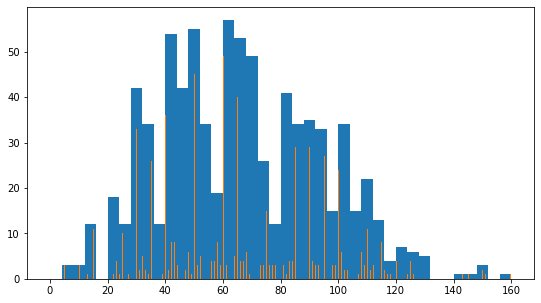

In [77]:
# remove the the second subplot setting
# the plots are now overlapping
plt.figure(figsize = [20, 5])

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data=pokemon, x='speed', bins=bins);

# histogram on right, example of too-small bin size
# plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data=pokemon, x='speed', bins=bins);

If you don't assign Axes objects as they're created, you can retrieve the current Axes using `ax = plt.gca()` (get current axis), or you can get a list of all Axes in a Figure fig by using `axes = fig.get_axes()`. As for creating subplots, you can use `fig.add_subplot()` in the same way as `plt.subplot()` above. If you already know that you're going to be creating a bunch of subplots, you can use the `plt.subplots()` function

### Demonstrate `plt.sca()` and `plt.text()`

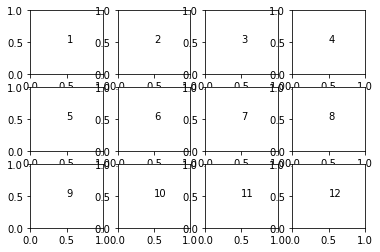

In [83]:
# grid of 3x4 subplots
fig, axes = plt.subplots(3, 4) 
# print('3 x 4 array:', axes)
axes = axes.flatten() # reshape from the 3x4 array into a 12-element vector
# print('Now is a vector:', axes)
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes